In [1]:
import sys 
sys.path.append('..')

import numpy as np
import pandas as pd

from ModelTools.regression.linear_model import LinearModel

In [2]:
df = pd.read_csv('../data/chr.csv').loc[lambda dt:dt.State==1]
df

,ts,E,Fcw,State,TcdIn,TcdOut,TcwIn,TcwOut
0,2023-06-25 00:00:00+08:00,1422.000046,833.473572,1.0,29.666667,34.111111,13.222222,7.555556
1,2023-06-25 00:01:00+08:00,1423.500023,824.065613,1.0,29.666667,34.111111,13.222222,7.555556
2,2023-06-25 00:02:00+08:00,1418.700027,826.442261,1.0,29.722222,34.166667,13.166667,7.555556
3,2023-06-25 00:03:00+08:00,1421.099968,832.410522,1.0,29.777778,34.222222,13.166667,7.555556
4,2023-06-25 00:04:00+08:00,1424.700050,830.453430,1.0,29.777778,34.222222,13.222222,7.555556
...,...,...,...,...,...,...,...,...
7196,2023-06-29 23:56:00+08:00,1394.399986,742.242065,1.0,30.055556,34.277778,12.611111,6.555556
7197,2023-06-29 23:57:00+08:00,1388.399963,729.013855,1.0,30.000000,34.277778,12.611111,6.500000
7198,2023-06-29 23:58:00+08:00,1393.199959,747.062683,1.0,30.000000,34.277778,12.611111,6.555556
7199,2023-06-29 23:59:00+08:00,1384.199982,745.868286,1.0,29.944444,34.222222,12.611111,6.500000


In [12]:
Q = '(TcwIn-TcwOut)*Fcw'
dt = 'TcdOut - TcwOut'
formula = f'E~I({Q})+I(({Q})**2) + I({dt}) + I(({dt})**2) + I({Q}):I({dt})-1'
mod = LinearModel(formula,data=df,scale=True).fit()
mod.summary()

100%|██████████| 1000/1000 [00:01<00:00, 926.77it/s]

                                                       estimate        std_Error         z    p_value           ci_lower           ci_upper
--------------------------------------------  -----------------  ---------------  --------  ---------  -----------------  -----------------
I((TcwIn - TcwOut) * Fcw)                           5.39447e+07      1.84442e+06   29.2474          0        5.04675e+07        5.76226e+07
I(((TcwIn - TcwOut) * Fcw) ** 2)                -4503.63           187.513        -24.0177          0    -4863.16           -4154.1
I(TcdOut - TcwOut)                                 -8.73181e+07      2.54272e+06  -34.3404          0       -9.26599e+07       -8.27723e+07
I((TcdOut - TcwOut) ** 2)                           3.37018e+07      1.13262e+06   29.7555          0        3.16111e+07        3.58738e+07
I((TcwIn - TcwOut) * Fcw):I(TcdOut - TcwOut)  -297185            13034.3          -22.8002          0  -322880            -273271
          R2      MSE      MAE        

In [ ]:
# mod.plot_check()

100%|██████████| 1000/1000 [00:00<00:00, 4086.37it/s]


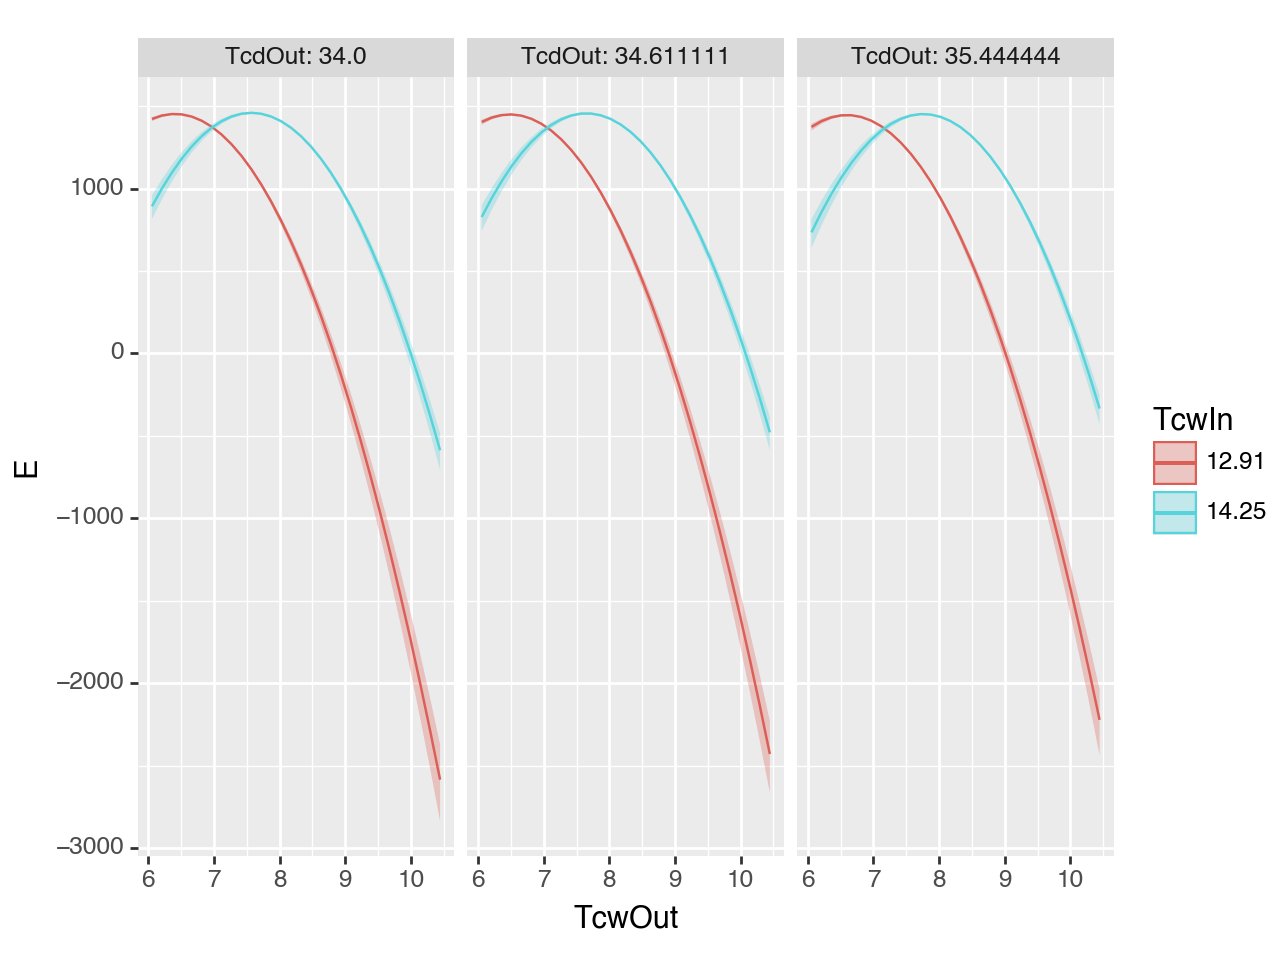

<Figure Size: (640 x 480)>

In [8]:
mod.plot_prediction({'TcwOut':'line','TcwIn':'meansd','TcdOut':'quantile'})

100%|██████████| 1000/1000 [00:00<00:00, 4380.68it/s]


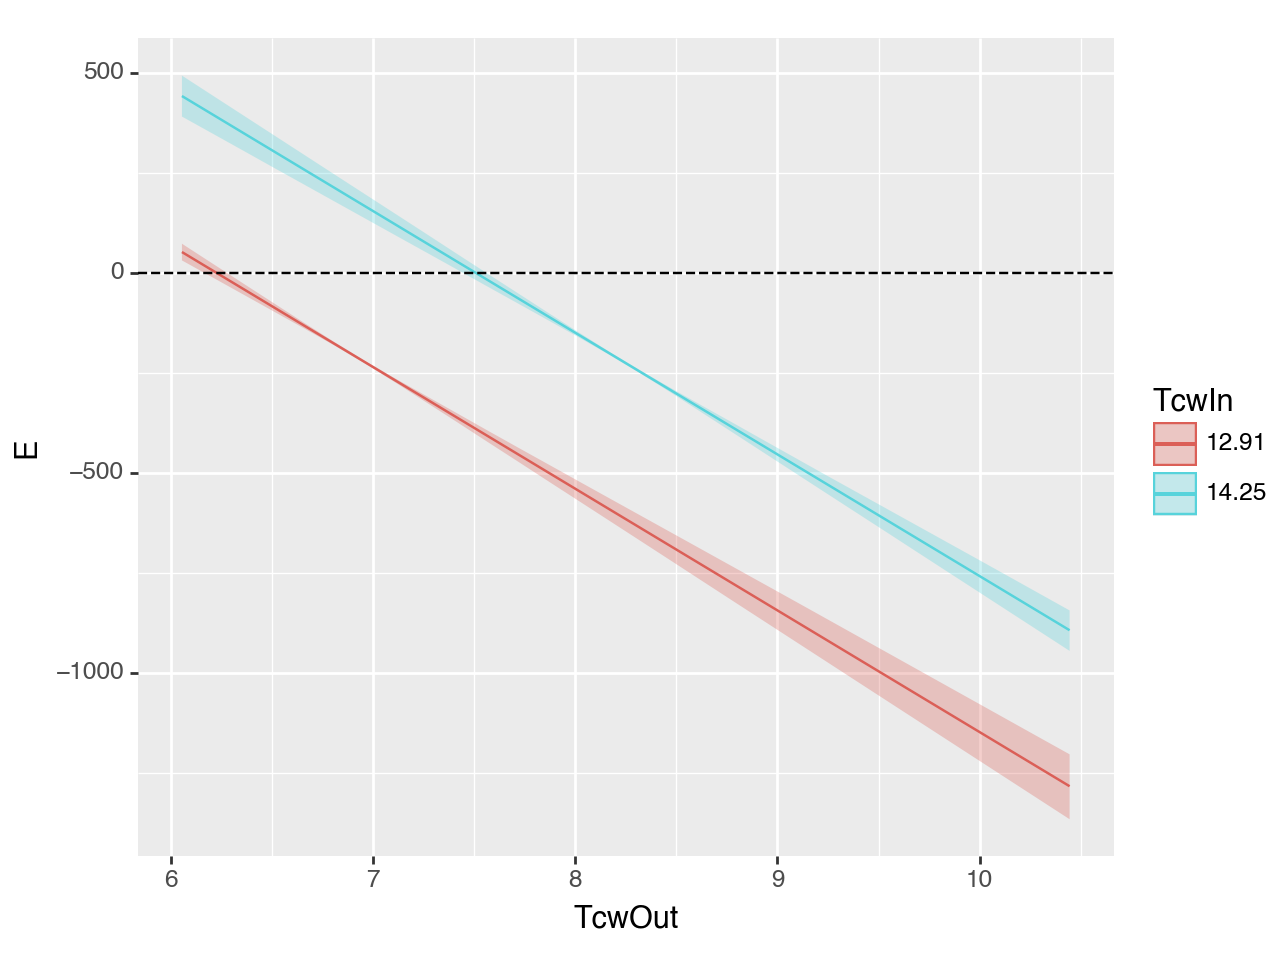

<Figure Size: (640 x 480)>

In [5]:
mod.plot_slope({'TcwOut':'line','TcwIn':'meansd'})